### New York City Taxi Fare Prediction 

## Abstract
Taxi rides in New York City illustrate a clear picture of city life. Every month, millions of data collected by taxi agencies enable them to gain insight into demand density, travel patterns, and traffic congestion.  In the last few years, the number of for-hire vehicles operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data-centric.

Independent Features description:
1.	pickup_datetime - timestamp value indicating when the taxi ride started.
2.	pickup_longitude - float for longitude coordinate of where the taxi ride started.
3.	pickup_latitude - float for latitude coordinate of where the taxi ride started.
4.	dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
5.	dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
6.	passenger count – an integer indicating the number of passengers in the taxi ride.
7.	Fare_class – an integer indicating the type of class of passengers

Target Feature description:
1.	fare_amount - float dollar amount of the cost of the taxi ride. 


## 1.Import Libraries

In [1]:
import pandas as pd

## 2.Read data from csv

In [2]:
df = pd.read_csv("taxifare.csv")

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


## 3. Exploratory Data Analysis and Preparation

### 3.1 - Understand the Dataset

In [4]:
df.shape

(120000, 8)

### 3.2 Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


### 3.3 Feature Engineering with respect to date time

In [6]:
import datetime
pd.to_datetime(df["pickup_datetime"])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [7]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])-datetime.timedelta(hours=4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [9]:
df["pickup_datetime"].dt.day

0         19
1         17
2         17
3         11
4         16
          ..
119995    18
119996    23
119997    18
119998    13
119999    17
Name: pickup_datetime, Length: 120000, dtype: int64

In [10]:
df["Year"] = df["pickup_datetime"].dt.year
df["Month"] = df["pickup_datetime"].dt.month
df["Day"] = df["pickup_datetime"].dt.day
df["Hours"] = df["pickup_datetime"].dt.hour
df["Minutes"] = df["pickup_datetime"].dt.minute

In [11]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


In [12]:
import numpy as np

In [13]:
df["MorNight"] = np.where(df["Hours"]<12,0,1)

In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,MorNight
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [15]:
df.drop("pickup_datetime", axis=1, inplace=True)

In [16]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,MorNight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [17]:
df["fare_class"].unique()

array([0, 1])

In [18]:
np.radians(df["dropoff_latitude"]-df["pickup_latitude"])

0         0.000248
1         0.000062
2         0.000264
3        -0.000144
4         0.000156
            ...   
119995   -0.000834
119996   -0.000564
119997   -0.000733
119998    0.000109
119999   -0.000155
Length: 120000, dtype: float64

#### The Haversine (or great circle) distance is the angular distance between two points on the surface of a sphere. The first coordinate of each point is assumed to be the latitude, the second is the longitude, given in radians. The dimension of the data must be 2.


In [19]:
from math import radians, cos, sin, asin, sqrt

def haversine(df):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1 = np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    
    dlat = np.radians(df["dropoff_latitude"]-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    # haversine formula 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [20]:
df['Total_distance']=haversine(df)

In [21]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,MorNight,Total_distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


In [22]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [23]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,MorNight,Total_distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


### Analysis of passenger_count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


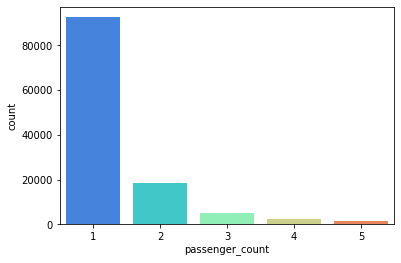

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.passenger_count,palette = "rainbow")
plt.show()

#### Conclusion: Most of the passengers per trip are one

### Analysis of fare amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


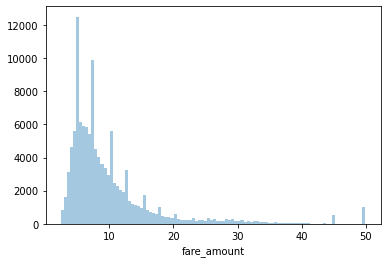

In [25]:
sns.distplot(df.fare_amount, kde=False, bins=100)

Conclusion: we can visualize that most of the fare amount are around 3 to 20 and only few fare amount are around 20 to 50$ 

### Distribution of haversine distance in kilometers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


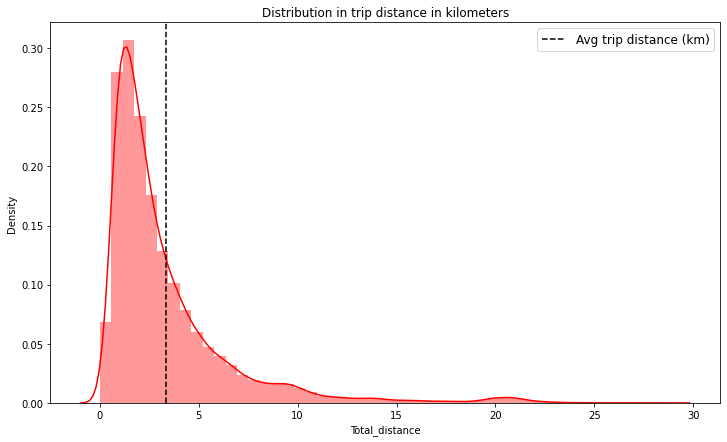

In [26]:
plt.figure(figsize = (12,7))
sns.distplot(df["Total_distance"],color = "r")
plt.axvline(df["Total_distance"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip distance (km)")
plt.title("Distribution in trip distance in kilometers")
plt.legend(loc = "best",prop = {"size" : 12})
plt.show()

### Analysis of fare amount with passenger count

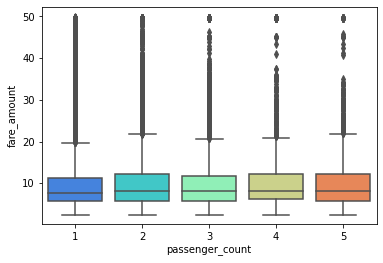

In [27]:
sns.boxplot(y='fare_amount', x='passenger_count',data=df, palette = "rainbow")
plt.show()

no of passenger wont affect fare amount

### scatter plot for Day and fare amount

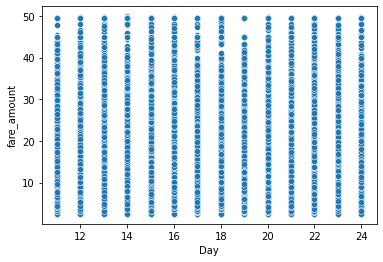

In [28]:
sns.scatterplot(data = df, x="Day", y="fare_amount")

Throught days of a month fare seems to be uniformly distributed

### Distribution of trip hours


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


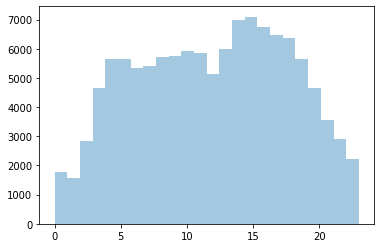

In [29]:
sns.distplot(x=df['Hours'], bins=24, kde=False)

No. of trips are lowest from midnight to 5 am and highest in evening when there are people returning from their workplaces. Time of the day also plays an important role.

### barplot for hour and fare amount

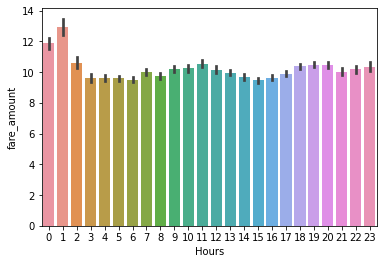

In [30]:
sns.barplot(x='Hours',y='fare_amount', data=df)

Fare is higher b/w 12am to 2 am 

### scatter plot for distance and fare amount

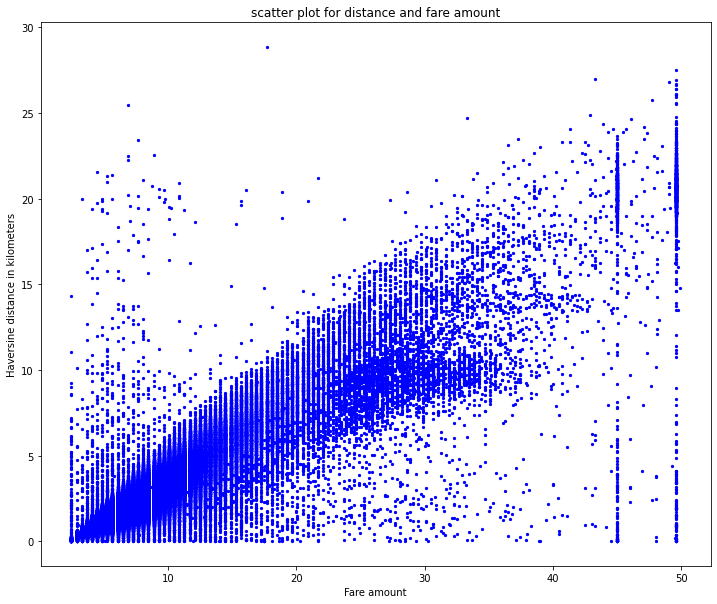

In [31]:
plt.figure(figsize = (12,10))

plt.scatter(df["fare_amount"],
            df["Total_distance"],s = 5,
            linewidths=1, c = "b")
plt.ylabel("Haversine distance in kilometers")
plt.xlabel("Fare amount")
plt.title("scatter plot for distance and fare amount")
plt.show()

fare amount increase as distance increase

### Feature Importance using ExtraTreeRegressor

In [32]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,MorNight,Total_distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [33]:
df.to_csv('final_data.csv')

In [34]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
feature_labels = X.columns.values

feature_importance = []
for feature in zip(feature_labels, model.feature_importances_):
    feature_importance.append(feature)

feature_importance

[('fare_class', 0.42368917341190115),
 ('passenger_count', 0.008037872848867093),
 ('Year', 0.0),
 ('Month', 0.0),
 ('Day', 0.022571262048183636),
 ('Hours', 0.024422128502328392),
 ('Minutes', 0.0324807623932417),
 ('MorNight', 0.002994537424685412),
 ('Total_distance', 0.4858042633707926)]

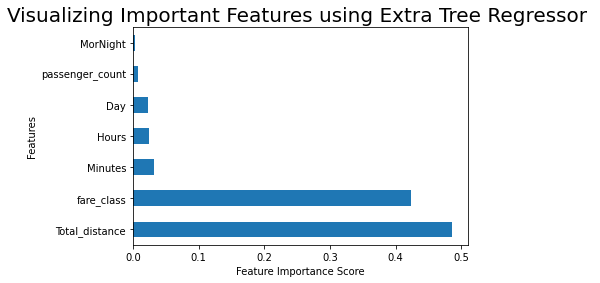

In [37]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features using Extra Tree Regressor ",{'fontsize':20})
plt.show()

### XGBRegressor

In [38]:
X.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,MorNight,Total_distance
0,0,1,2010,4,19,4,17,0,2.126312
1,0,1,2010,4,17,11,43,0,1.392307
2,1,2,2010,4,17,7,23,0,3.326763
3,0,1,2010,4,11,17,25,1,1.864129
4,1,1,2010,4,16,22,19,1,7.231321


In [39]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [41]:
import xgboost
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

[13:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [42]:
y_pred=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


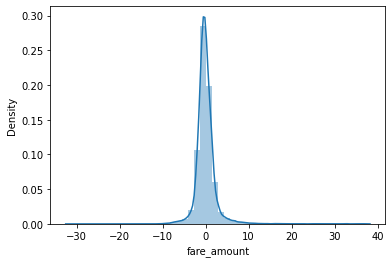

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y_test-y_pred)

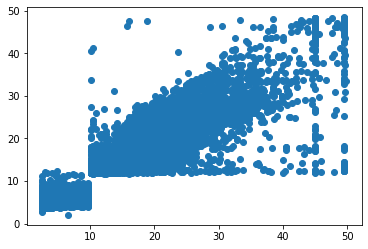

In [44]:
plt.scatter(y_test,y_pred)

In [45]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9409700619691562
MAE: 1.4219838653206827
MSE: 6.554382746876185
RMSE: 2.5601528756846115


## HyperParameter Training

In [46]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [47]:
#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgboost.XGBRegressor()

In [50]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [51]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
xg_random.best_params_

{'learning_rate': '0.05',
 'max_depth': 25,
 'min_child_weight': 6,
 'n_estimators': 1100,
 'subsample': 0.8}

In [53]:
y_pred=xg_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


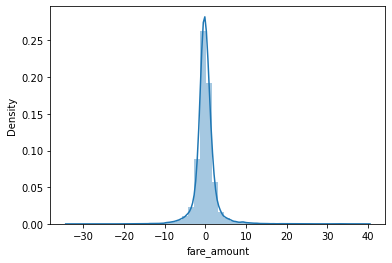

In [54]:
sns.distplot(y_test-y_pred)

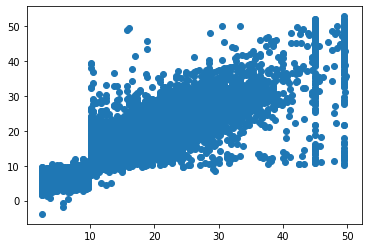

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9264240594951122
MAE: 1.5838636132686006
MSE: 8.108272772626755
RMSE: 2.8475029012499276


## Artificial Neural Network(Regression Problem)

In [58]:
X_train.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,MorNight,Total_distance
40090,1,1,2010,4,12,16,17,1,3.181725
90425,0,2,2010,4,18,7,39,0,1.528133
63492,0,1,2010,4,11,18,53,1,4.020180
19581,1,1,2010,4,21,20,51,1,6.338458
39057,1,1,2010,4,14,16,46,1,6.823749


In [59]:
y_train.head()

40090    17.7
90425     4.9
63492     8.1
19581    17.7
39057    15.3
Name: fare_amount, dtype: float64

In [60]:
X_train.shape[1]

9

In [61]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [62]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5628/5628 [============================

In [63]:
### Model Evaluation

In [64]:
prediction=NN_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


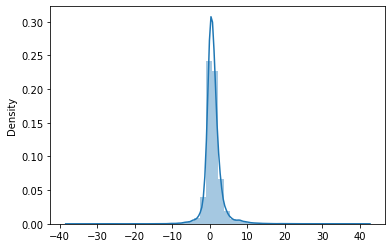

In [65]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

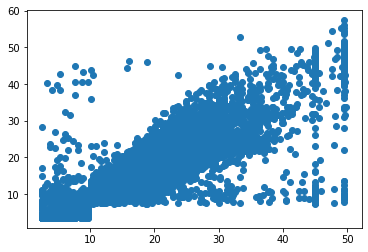

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)

In [67]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.6056485385041765
MSE: 9.140885456678202
RMSE: 3.0233897295383874


### TPOTRegressor Automated Library

In [69]:
pip install tpot

     |████████████████████████████████| 87 kB 3.1 MB/s 
     |████████████████████████████████| 160 kB 32.1 MB/s 
     |████████████████████████████████| 192.9 MB 72 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=73499bbdf04f7a0a925dd3ba0e31f7bfb8210832a781e62787ab2a5c69c7ee9a
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [70]:
from tpot import TPOTRegressor

In [71]:
regressor=TPOTRegressor()

In [72]:
regressor.fit(X_train,y_train)

TPOTRegressor()

In [74]:
tpot = TPOTRegressor(generations=1, population_size=10, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_taxiFaredocumentation_pipeline.py')

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -6.6694533560074545

Best pipeline: ElasticNetCV(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=16, n_estimators=100), l1_ratio=0.45, tol=0.001)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


-6.579890079423147


In [75]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('final_data.csv', sep=',', dtype=np.float64)
features = tpot_data.drop('fare_amount', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['fare_amount'], random_state=42)


In [76]:
# Average CV score on the training set was: -6.6694533560074545
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=16, n_estimators=100)),
    ElasticNetCV(l1_ratio=0.45, tol=0.001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [77]:
results


array([ 4.45318563,  7.24627163,  6.64175583, ...,  7.25530353,
       13.1392953 ,  7.11247282])

In [78]:
training_target

84145      9.7
60838     16.5
99429      4.9
26258     10.5
12165     15.7
          ... 
110268     8.9
119879     4.1
103694    14.1
860        6.1
15795      4.9
Name: fare_amount, Length: 90000, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


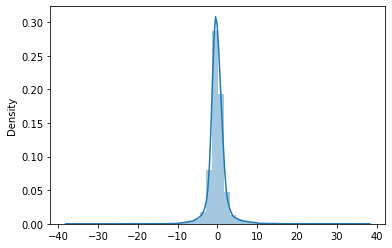

In [79]:
import seaborn as sns
sns.distplot(testing_target.values-results)

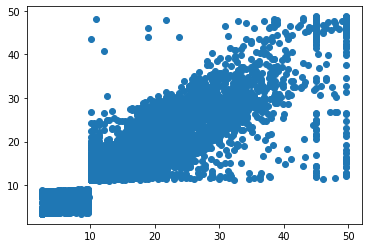

In [80]:
import matplotlib.pyplot as plt
plt.scatter(testing_target,results)

In [81]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(testing_target, results))
print('MSE:', metrics.mean_squared_error(testing_target, results))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testing_target, results)))

MAE: 1.4024733378171717
MSE: 6.307831130788921
RMSE: 2.511539593713171


## Conclusion:
The Xgboost regressor, ANN, and Tpot regressor algorithms have been implemented on the given dataset. The performance of the models was evaluated using the R-square, MAE, MSE, and RMSE.
From the above results, it can be concluded that the Tpot regressor performs better. which can be used to predict the taxi fare in New York City
